# Preprocessing text data for Natural Language Processing

This is a short, user-oriented introduction to the Python library `cophi_toolbox`.

In [1]:
import cophi_toolbox as ct

## High-level API

With `ct.pipe()`, you can pipe a collection of text files through several NLP tasks, and get a document-term matrix with useful attributes and methods.

### What about the parameters?

You can use Python's built-in `help()` function to access `cophi_toolbox`'s short and sweet documentation:

In [2]:
help(ct.pipe)

Help on function pipe in module cophi_toolbox.api:

pipe(directory:Union[str, pathlib.Path], pathname_pattern:str='*.*', treat_as:Union[str, NoneType]=None, encoding:str='utf-8', lowercase:bool=True, ngrams:int=1, token_pattern:str='\\p{L}+\\p{P}?\\p{L}+', maximum:Union[int, NoneType]=None) -> Tuple[cophi_toolbox.model.Corpus, pandas.core.frame.DataFrame]
    Pipe a collection of text files through multiple NLP tasks.
    
    Parameters:
        directory: Path to the corpus directory.
        pathname_pattern: Glob pattern for text files.
        treat_as: Treat text files like this suffix. If None, `pathname_pattern` is considered.
        encoding: Encoding to use for UTF when reading.
        lowercase: If True, all letters are lowercase.
        ngrams: The `n` in ngram, e.g. 1 for unigram, 2 for bigram, etc.
        token_pattern: Regex pattern for a token.
        maximum: If not None, stop tokenizing after that much tokens.
    
    Returns:
        A Corpus model object and a

### Basic usage

Depending on the size of the text collection, this may take a while. These are the basic steps of the pipeline:

1. read,
2. tokenize,
3. create ngrams,
4. count ngrams,
5. arrange in a document-term matrix.

In [3]:
corpus, metadata = ct.pipe(directory="british-fiction-corpus",
                           pathname_pattern="**/*.txt",  # ref.: https://en.wikipedia.org/wiki/Glob_(programming)
                           treat_as=".txt",
                           encoding="utf-8",
                           lowercase=True,
                           ngrams=1,
                           token_pattern=r"\p{L}+\p{P}?\p{L}+",
                           maximum=None)

One useful attribute would be `size`, which gives you information about the number of documents and types:

In [4]:
corpus.size

documents       10
types        33050
dtype: int64

You can access the document-term matrix with the attribute `dtm`, which returns a pandas `DataFrame`:

In [5]:
corpus.dtm.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
66dc526e-9ccf-11e8-9cdd-002710199d64,0,0,0,0,0,0,0,0,0,0
66dc526f-9ccf-11e8-9cdd-002710199d64,0,1,0,0,0,0,0,0,0,0
66dc5270-9ccf-11e8-9cdd-002710199d64,1,1,0,2,0,0,1,0,0,0


The function `ct.pipe()` returned not only the `Corpus` object but also a `DataFrame` with metadata extracted from the filenames:

In [6]:
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,66dc526e-9ccf-11e8-9cdd-002710199d64
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,66dc526f-9ccf-11e8-9cdd-002710199d64
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,66dc5270-9ccf-11e8-9cdd-002710199d64


You can easily add additional metadata to the existing `DataFrame`:

In [7]:
metadata["year"] = [1868, 1853, 1860, 1799, 1742, 1749, 1844, 1850, 1876, 1848]
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid,year
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,66dc526e-9ccf-11e8-9cdd-002710199d64,1868
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,66dc526f-9ccf-11e8-9cdd-002710199d64,1853
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,66dc5270-9ccf-11e8-9cdd-002710199d64,1860


Or you can save it with its pandas `to_csv()` method, edit or enrich it with a spreadsheet program like Excel, and read it again with `pd.read_csv()`.

> In case you want to map metadata to the document-term matrix, be aware that each line in the document-term matrix must have a unique index value.

The `Corpus` object also has a static method for mapping metadata (based on a [UUID](https://en.wikipedia.org/wiki/Universally_unique_identifier)) to the document-term matrix:

In [8]:
corpus.map_metadata(matrix=corpus.dtm,
                    metadata=metadata,
                    uuid="uuid",  # this is the connection (or, values of this column) between metadata and document in the matrix
                    fields=["year", "title"],  # select one or multiple metadata fields
                    sep="_").iloc[:3,:10]  # glue single metadata field values with this separator together

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
1868_trollope_phineas,0,0,0,0,0,0,0,0,0,0
1853_dickens_bleak,0,1,0,0,0,0,0,0,0,0
1860_eliot_mill,1,1,0,2,0,0,1,0,0,0


### Advanced usage

The `Corpus` object has some useful methods and attributes. In addition to various normalized or standardized document-term matrices, there are a multitude of lexical complexity measures – by document or corpus.

#### Corpus vocabulary (or types)

In [9]:
corpus.types[:10]

["a'mighty",
 "a'most",
 "a'n",
 "a'ready",
 'a-bakin',
 'a-be',
 'a-beatin',
 'a-bed',
 'a-begging',
 'a-bleatin']

#### Most frequent words

You can return a list of the tokens itself (with `as_list=True`, which is default):

In [10]:
corpus.mfw(n=10,
           rel_freqs=True,  # use document-term matrix with relative word frequencies, otherwise absolute frequencies
           as_list=True)

['the', 'and', 'to', 'of', 'in', 'he', 'was', 'that', 'his', 'it']

Or with their frequencies:

In [11]:
mfw = corpus.mfw(n=10,
                 rel_freqs=False,  # this time False
                 as_list=False)
mfw

the     65281
and     44016
to      41217
of      36234
in      22514
he      20581
was     19609
that    19295
his     16007
it      14827
dtype: int64

Because this is a pandas `Series`, you can easily plot the frequencies (first using `sort_values()`, that most common word is at the top of the plot):

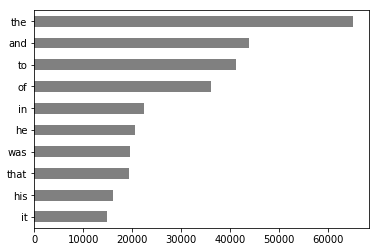

In [12]:
%matplotlib inline

mfw.sort_values().plot.barh(color="grey")

#### Hapax legomena

In corpus linguistics, a hapax legomenon is a word that occurs only once within a context, or in this case in a single text.

In [13]:
corpus.hapax[:10]

["a'mighty",
 "a'n",
 'a-bakin',
 'a-beatin',
 'a-begging',
 'a-bleatin',
 'a-bringin',
 'a-carrying',
 'a-collectin',
 'a-comin']

#### Drop features from document-term matrix

In [14]:
features = corpus.mfw(n=100) + corpus.hapax
print(f"A total of {len(features)} features will be dropped.")

A total of 16595 features will be dropped.


In [15]:
print(f"Vocabulary size before: {corpus.size['types']}")

Vocabulary size before: 33050


In [16]:
dtm = corpus.drop(dtm=corpus.dtm,
                  features=features)
print(f"Vocabulary size after: {dtm.shape[1]}")

Vocabulary size after: 16455


#### Frequency spectrum

How often does a frequency occur in the corpus?

In [17]:
freq_spectrum = corpus.freq_spectrum[:10]
freq_spectrum

1     12616
2      4508
3      2627
4      1760
5      1253
6      1012
7       863
8       586
9       519
10      467
dtype: int64

Plotting is easy:

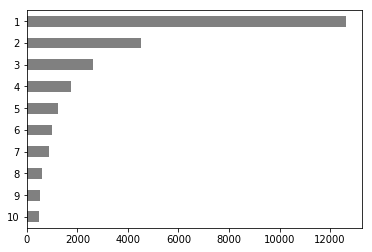

In [18]:
freq_spectrum.sort_values().plot.barh(color="grey")

#### Document-term matrix sorted in descending order

In [19]:
corpus.sort(dtm=corpus.dtm).iloc[:3,:10]

,the,and,to,of,in,he,was,that,his,it
66dc526e-9ccf-11e8-9cdd-002710199d64,6412,4226,5175,4004,2416,3667,2424,3373,2094,1854
66dc526f-9ccf-11e8-9cdd-002710199d64,4918,3706,2928,2642,1909,1387,1194,1389,1079,1464
66dc5270-9ccf-11e8-9cdd-002710199d64,4053,2979,2701,2216,1389,1135,1456,1139,1065,1129


#### Document-term matrix with z-scores

Used formula is: $z_x = \frac{x - \mu}{\sigma}$

In [20]:
corpus.zscores.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
66dc526e-9ccf-11e8-9cdd-002710199d64,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
66dc526f-9ccf-11e8-9cdd-002710199d64,-0.474342,0.162698,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
66dc5270-9ccf-11e8-9cdd-002710199d64,1.897367,0.162698,-0.316228,0.621059,-0.316228,-0.316228,2.846050,-0.444478,-0.474342,-0.316228


#### Document-term matrix with TF-IDF scores

Used formula is: $tf-idf_{t,d} \; = \; tf_{t,d} \times idf_t \; = \; tf_{t,d} \times log(\frac{N}{df_t})$

In [21]:
corpus.tfidf.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
66dc526e-9ccf-11e8-9cdd-002710199d64,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
66dc526f-9ccf-11e8-9cdd-002710199d64,0.000000,0.000009,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
66dc5270-9ccf-11e8-9cdd-002710199d64,0.000017,0.000010,0.0,0.000035,0.0,0.0,0.000025,0.0,0.0,0.0


#### Sum tokens by document

In [22]:
corpus.sum_tokens

66dc526e-9ccf-11e8-9cdd-002710199d64    149926
66dc526f-9ccf-11e8-9cdd-002710199d64     99570
66dc5270-9ccf-11e8-9cdd-002710199d64     92012
66dc5271-9ccf-11e8-9cdd-002710199d64    127439
66dc5272-9ccf-11e8-9cdd-002710199d64     87923
66dc5273-9ccf-11e8-9cdd-002710199d64    158439
66dc5274-9ccf-11e8-9cdd-002710199d64     97524
66dc5275-9ccf-11e8-9cdd-002710199d64    147059
66dc5276-9ccf-11e8-9cdd-002710199d64    146348
66dc5277-9ccf-11e8-9cdd-002710199d64    203949
dtype: int64

#### Sum types by document

In [23]:
corpus.sum_types

66dc526e-9ccf-11e8-9cdd-002710199d64     7845
66dc526f-9ccf-11e8-9cdd-002710199d64     9174
66dc5270-9ccf-11e8-9cdd-002710199d64     8828
66dc5271-9ccf-11e8-9cdd-002710199d64    10357
66dc5272-9ccf-11e8-9cdd-002710199d64     7574
66dc5273-9ccf-11e8-9cdd-002710199d64    10023
66dc5274-9ccf-11e8-9cdd-002710199d64     9298
66dc5275-9ccf-11e8-9cdd-002710199d64    10006
66dc5276-9ccf-11e8-9cdd-002710199d64     7875
66dc5277-9ccf-11e8-9cdd-002710199d64    14225
dtype: int64

#### Get a document by its UUID

In [24]:
uuid = corpus.documents.index[0]  # of the first document
uuid

'66dc526e-9ccf-11e8-9cdd-002710199d64'

Select it and show its bag-of-words representation:

In [25]:
document = corpus.documents[uuid]
document.bow[:10]

phineas      954
finn         354
by           570
anthony        1
trollope       1
volume         3
chapter       51
dr            29
of          4004
killaloe      33
dtype: int64

Or its tokens (which is a generator):

In [26]:
document.tokens

<generator object Document.tokens.<locals>.<genexpr> at 0x7f1e94e8a468>

In [27]:
tokens = list(document.tokens)[:6]
tokens

['phineas', 'finn', 'by', 'anthony', 'trollope', 'volume']

#### Get token lengths

In [28]:
document.len

array([7, 4, 2, ..., 6, 2, 4])

Or the mean token length:

In [29]:
document.len.mean()

4.271233808678948

#### Sliding window

You can iterate with a sliding window over your document and count tokens in this window:

In [30]:
for chunk in document.window(n=10):
    print(chunk)
    break

phineas     1
finn        2
by          1
anthony     1
trollope    1
volume      1
chapter     1
dr          1
of          1
dtype: int64


#### Get paragraphs or segments

In [31]:
paragraphs = list(document.paragraphs(sep="\n"))
segments = list(document.segments(segment_size=1000))

print(f"There are {len(paragraphs)} paragraphs.")
print(f"And {len(segments)} segments, 1000 tokens each segment.")
print(f"First paragraph: {paragraphs[0]}\n")

There are 13684 paragraphs.
And 150 segments, 1000 tokens each segment.
First paragraph: PHINEAS FINN



#### Complexity metrics

There are a plenty of complexity metrics for measuring lexical richness (adapted from [here](https://github.com/tsproisl/Linguistic_and_Stylistic_Complexity)).


Measures that use sample size and vocabulary size:

  * Type-token ratio
  * Guiraud’s $R$
  * Herdan’s $C$
  * Dugast’s $k$
  * Maas’ $a^2$
  * Dugast’s $U$
  * Tuldava’s $LN$
  * Brunet’s $W$
  * Carroll’s $CTTR$
  * Summer’s $S$

Measures that use part of the frequency spectrum:

  * Honoré’s $H$
  * Sichel’s $S$
  * Michéa’s $M$

Measures that use the whole frequency spectrum:

  * Entropy
  * Yule’s $K$
  * Simpson’s $D$
  * Herdan’s $V_m$

Parameters of probabilistic models:

  * Orlov’s $Z$


You can access them for the _whole corpus_ using the corresponding attributes:

In [32]:
corpus.ttr

0.025225368248397752

Or by _document_ using the `complexity()` method. You _have_ to use a sliding window in this case.

In [33]:
sttr = corpus.complexity(measure="ttr", window=2000)

Of course you can also map metadata here again:

In [34]:
sttr = corpus.map_metadata(sttr, metadata)
sttr

,sttr,ci
trollope_phineas,0.307230,0.004331
dickens_bleak,0.359245,0.007024
eliot_mill,0.365087,0.007684
eliot_adam,0.374310,0.006497
fielding_joseph,0.363512,0.004977
fielding_tom,0.359880,0.004151
thackeray_lyndon,0.378406,0.005436
dickens_david,0.346240,0.003996
trollope_prime,0.313212,0.004565
thackeray_vanity,0.388614,0.003362


And visualize the result e.g. as a barplot:

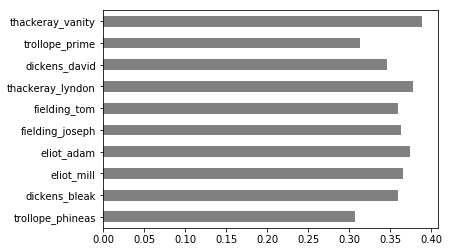

In [35]:
sttr["sttr"].plot.barh(color="grey")

#### Going back to the document level

The complexity measures can be accessed via the `Corpus` object as well as via a `Document` object – even more flexible in the case of `Document`, e.g. using the `bootstrap()` method:

In [36]:
results = list(document.bootstrap(measure="ttr", window=2000))

print(f"These are the TTRs of the first 10 windows: {results[:10]}")

These are the TTRs of the first 10 windows: [0.327, 0.312, 0.33, 0.3185, 0.3195, 0.3215, 0.3125, 0.3115, 0.315, 0.307]


If you put those in a pandas `Series`, you could plot them and see how the TTRs differ over the document:

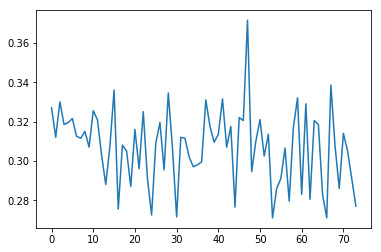

In [37]:
import pandas as pd

pd.Series(results).plot.line()

## Low-level model classes

The `ct.pipe()` function wraps three classes:

1. `Textfile` models a document on the file level.
2. `Document` models a document on the text level.
3. `Corpus` models a collection of documents on the corpus level.

### Textfile

In [38]:
file = "/home/severin/kafka_derprozeß.xml"

In [39]:
f = ct.Textfile(filepath=file,
                treat_as=".xml")

In [40]:
f.title

'kafka_derprozeß'

In [41]:
f.suffix

'.xml'

In [42]:
f.parent

'/home/severin'

In [43]:
f.content.strip()[:10]

'Der Prozeß'

#### Context-manager

In [44]:
with ct.Textfile(file, treat_as=".xml") as document:
    print(f"First 10 characters of '{document.title + document.suffix}', treated as XML: \n{document.content.strip()[:10]}")

First 10 characters of 'kafka_derprozeß.xml', treated as XML: 
Der Prozeß


In [45]:
with ct.Textfile(file, treat_as=".txt") as document:
    print(f"First 39 characters of '{document.title + document.suffix}', treated as plain text: \n{document.content.strip()[:39]}")

First 39 characters of 'kafka_derprozeß.xml', treated as plain text: 
<?xml version="1.0" encoding="UTF-8"?>



#### Processing XML

In [46]:
from lxml import etree

tree = f.parse_xml(parser=etree.XMLParser())
tree

In [47]:
tree.xpath("tei:text//text()", namespaces={"tei": "http://www.tei-c.org/ns/1.0"})[31]

'Jemand mußte Josef K. verleumdet haben, denn ohne daß er etwas Böses getan hätte, wurde er eines Morgens verhaftet. Die Köchin der Frau Grubach, seiner Zimmervermieterin, die ihm jeden Tag gegen acht Uhr früh das Frühstück brachte, kam diesmal nicht. Das war noch niemals geschehen. K. wartete noch ein Weilchen, sah von seinem Kopfkissen aus die alte Frau, die ihm gegenüber wohnte und die ihn mit einer an ihr ganz ungewöhnlichen Neugierde beobachtete, dann aber, gleichzeitig befremdet und hungrig, läutete er. Sofort klopfte es und ein Mann, den er in dieser Wohnung noch niemals gesehen hatte, trat ein. Er war schlank und doch fest gebaut, er trug ein anliegendes schwarzes Kleid, das, ähnlich den Reiseanzügen, mit verschiedenen Falten, Taschen, Schnallen, Knöpfen und einem Gürtel versehen war und infolgedessen, ohne daß man sich darüber klar wurde, wozu es dienen sollte, besonders praktisch erschien. »Wer sind Sie?« fragte K. und saß gleich halb aufrecht im Bett. Der Mann aber ging über

#### Use case: Segmenting and tokenizing a textfile

Construct a `Document` object:

In [48]:
d = ct.Document(text=f.content)

Segmenting the document:

In [49]:
segments = list(d.segments(segment_size=1000))
print(f"{len(segments)} segments in '{f.title}'.")

71 segments in 'kafka_derprozeß'.


Creating labels for the segment:

In [50]:
labels = [f"{f.title}_{n}" for n in range(len(segments))]

In [51]:
pd.Series(segments, index=labels).head(10)

kafka_derprozeß_0    [der, prozeß, hdl, de, textgrid:qmx, der, anno...
kafka_derprozeß_1    [vielleicht, noch, besaß, schätzte, er, nicht,...
kafka_derprozeß_2    [worte, die, ich, mit, einem, mir, ebenbürtige...
kafka_derprozeß_3    [gehen, pflegte, spät, nach, hause, kam, und, ...
kafka_derprozeß_4    [er, dann, hinüber, die, drei, wichen, auch, s...
kafka_derprozeß_5    [mann, aufmerksam, machte, den, er, selbst, sc...
kafka_derprozeß_6    [ja, bloß, die, vermieterin, nun, ich, habe, a...
kafka_derprozeß_7    [fenster, lag, und, die, müden, augen, drückte...
kafka_derprozeß_8    [den, leib, schickt, da, sie, aber, doch, frei...
kafka_derprozeß_9    [hat, eine, größere, summe, von, mir, geliehen...
dtype: object

## Low-level helper functions

#### Tokenization

In [52]:
tokens = ct.find_tokens(document="Jemand mußte Josef K. verleumdet haben.",
                        pattern="\w+",
                        maximum=4)

print(f"The return value is a {type(tokens)}.")
print(f"Use it e.g. as a list: list(tokens) -> {list(tokens)}")

The return value is a <class 'generator'>.
Use it e.g. as a list: list(tokens) -> ['Jemand', 'mußte', 'Josef', 'K']


#### Constructing ngrams

In [53]:
bigrams = ct.construct_ngrams(tokens=['Jemand', 'mußte', 'Josef', 'K'],
                              n=2,
                              sep=" ")
print(f"The return value is also a {type(bigrams)}.")
print(f"You can use it as a list, too: list(bigrams) -> {list(bigrams)}")

The return value is also a <class 'generator'>.
You can use it as a list, too: list(bigrams) -> ['Jemand mußte', 'mußte Josef', 'Josef K']


#### Counting tokens

In [54]:
counts = ct.count_tokens(tokens=['Jemand mußte', 'mußte Josef', 'Josef K'])

print(f"The return value is a {type(counts)})")
print(f"But you can use it as a dictionary, if you want to: {counts.to_dict()}")

The return value is a <class 'pandas.core.series.Series'>)
But you can use it as a dictionary, if you want to: {'Jemand mußte': 1, 'mußte Josef': 1, 'Josef K': 1}
